In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

import seaborn as sns


In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#no null values
#expect gender all are numerical values


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#avg age is 38
#min age i8 and max age is 70
#maimum incomes is $137
#max speding score is 99


<AxesSubplot:xlabel='Age', ylabel='count'>

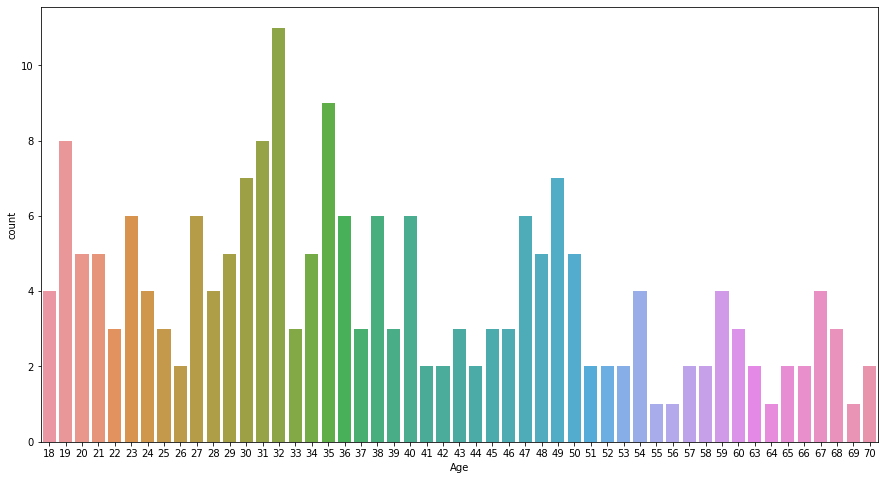

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='Age')


<function matplotlib.pyplot.legend(*args, **kwargs)>

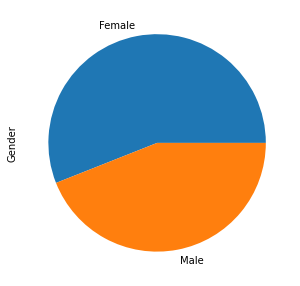

In [17]:
plt.figure(figsize=(12,5))
df.Gender.value_counts().plot(kind='pie')
plt.legend

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.loc[df['Spending Score (1-100)']>50,'Gender'].value_counts()

Female    53
Male      44
Name: Gender, dtype: int64

Text(0, 0.5, 'spending score')

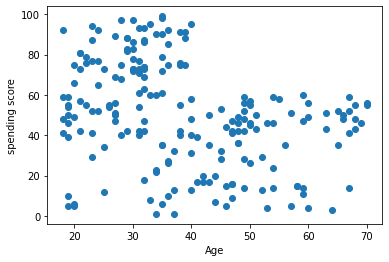

In [31]:
plt.scatter(df.Age,df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('spending score')

In [ ]:
#for lower ages i.e 20-40 spending score is high
#as the age increases spending is descreasing

Text(0, 0.5, 'spending score')

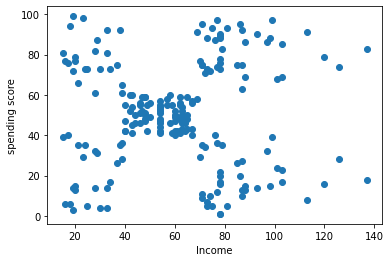

In [35]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Income')
plt.ylabel('spending score')

In [36]:
#for income between 40-50 their spending score is mostly 40-60


C:\Users\Pavani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

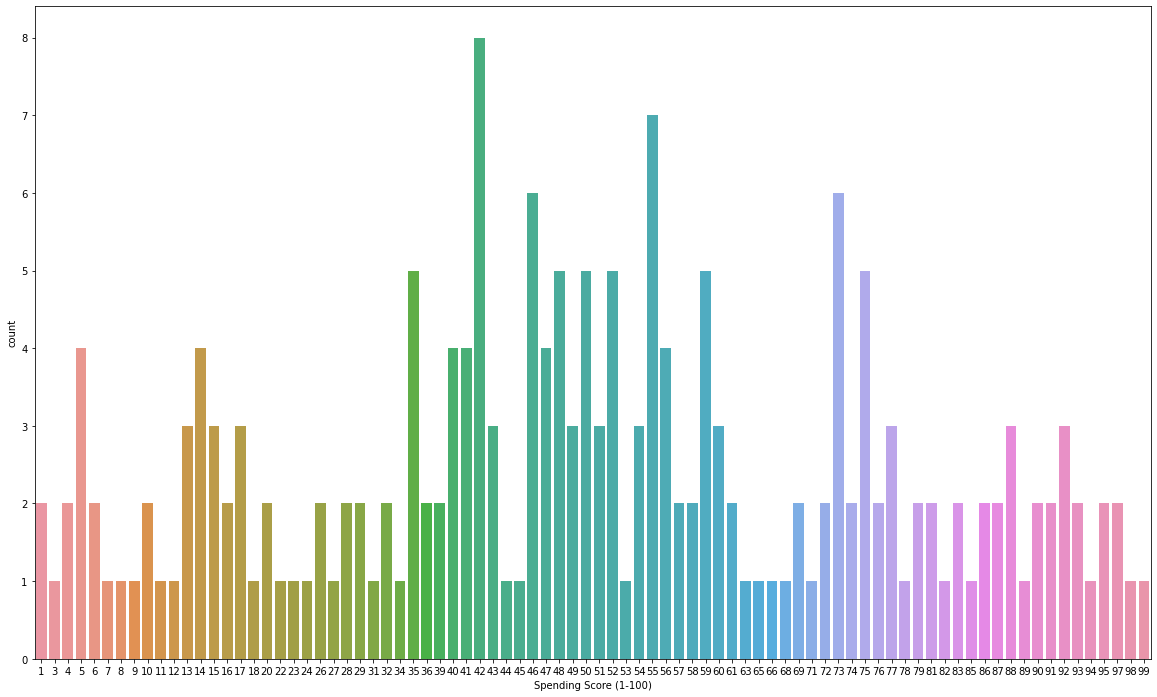

In [40]:
plt.figure(figsize=(20,12))
sns.countplot(df['Spending Score (1-100)'],data=df)

In [41]:
#customers having 42k-60k visiting mall more frequently

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

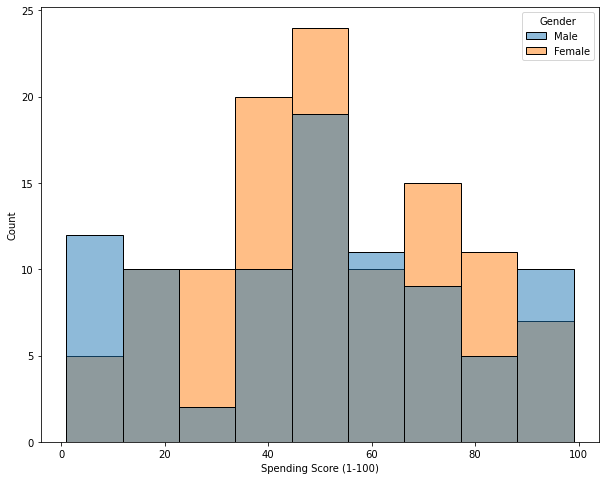

In [45]:
plt.figure(figsize=(10,8))
sns.histplot(df,x ='Spending Score (1-100)',hue='Gender')

In [46]:
from sklearn.preprocessing import LabelEncoder

In [48]:
enc =LabelEncoder()

In [49]:
df.Gender = enc.fit_transform(df.Gender)

In [50]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [51]:
df.drop('CustomerID',axis=1,inplace=True)

In [52]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [54]:
lst =[]
for i in range(1,11):
    kmodel=KMeans(n_clusters=i, n_init=15, max_iter=500)
    kmodel.fit(df)
    lst.append(kmodel.inertia_)

C:\Users\Pavani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


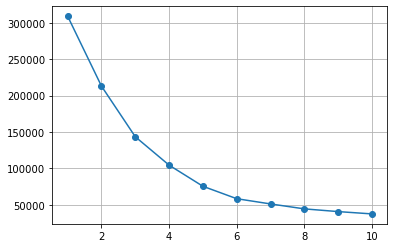

In [57]:
plt.plot(range(1,11),lst,marker='o')
plt.grid()

In [58]:
#k=6
kmodel=KMeans(n_clusters=6)

In [59]:
kmodel.fit(df)

KMeans(n_clusters=6)

In [61]:
prediction=kmodel.predict(df)

In [62]:
prediction

array([5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 3, 0, 3, 4,
       5, 0, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [63]:
kmodel.cluster_centers_

array([[ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952]])

In [65]:
len(kmodel.cluster_centers_)

6

In [66]:
df['clusters']=prediction

In [67]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,5
1,1,21,15,81,0
2,0,20,16,6,5
3,0,23,16,77,0
4,0,31,17,40,5


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

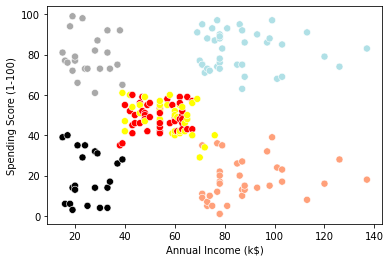

In [75]:
color = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'yellow', 'black'])
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], c = color[kmodel.labels_], s = 50)
